In [20]:
import sys
import os


print("Python version:", sys.version)

# (Optional) Install sentence-transformers once
# Uncomment and run once if not installed:
# !{sys.executable} -m pip install sentence-transformers

import warnings
warnings.filterwarnings("ignore")

print("Current working directory:", os.getcwd())

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Current working directory: C:\Users\sxk9280\Desktop\capstone_project\notebooks


In [21]:
# ==========================================================
# Phase 1 - Setup & Data Loading
# ==========================================================
import pandas as pd
import numpy as np
import zipfile
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Correct path to your dataset
csv_path = "../data/Resume.csv"

# Load the dataset
df = pd.read_csv(csv_path)

print("✅ File loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())

# Preview the first few rows
df.head(2)

✅ File loaded successfully!
Shape of dataset: (2484, 4)

Columns: ['ID', 'Resume_str', 'Resume_html', 'Category']


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR


In [22]:
# ==========================================================
# Phase 2 - Data Cleaning & Preprocessing
# ==========================================================

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only the first time)
nltk.download('stopwords')
nltk.download('wordnet')

# Keep only the necessary columns
df = df[['Resume_str', 'Category']].rename(columns={'Resume_str': 'Resume'})

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Keep letters only
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stopwords + lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['Cleaned_Resume'] = df['Resume'].apply(clean_text)

print(" Text cleaning completed!")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sxk9280\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sxk9280\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 Text cleaning completed!


In [23]:
threshold = 40  # categories must have at least 40 samples

counts = df["Category"].value_counts()
df = df[df["Category"].isin(counts[counts >= threshold].index)]

print("Categories after filtering:")
print(df["Category"].value_counts())

Categories after filtering:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ENGINEERING               118
ADVOCATE                  118
CHEF                      118
FINANCE                   118
ACCOUNTANT                118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
Name: count, dtype: int64


This removes only BPO (22) and optionally AUTOMOBILE (36)
Leave threshold = 40 — it’s the best balance.

Number of categories: 22
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ENGINEERING               118
ADVOCATE                  118
CHEF                      118
FINANCE                   118
ACCOUNTANT                118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
Name: count, dtype: int64


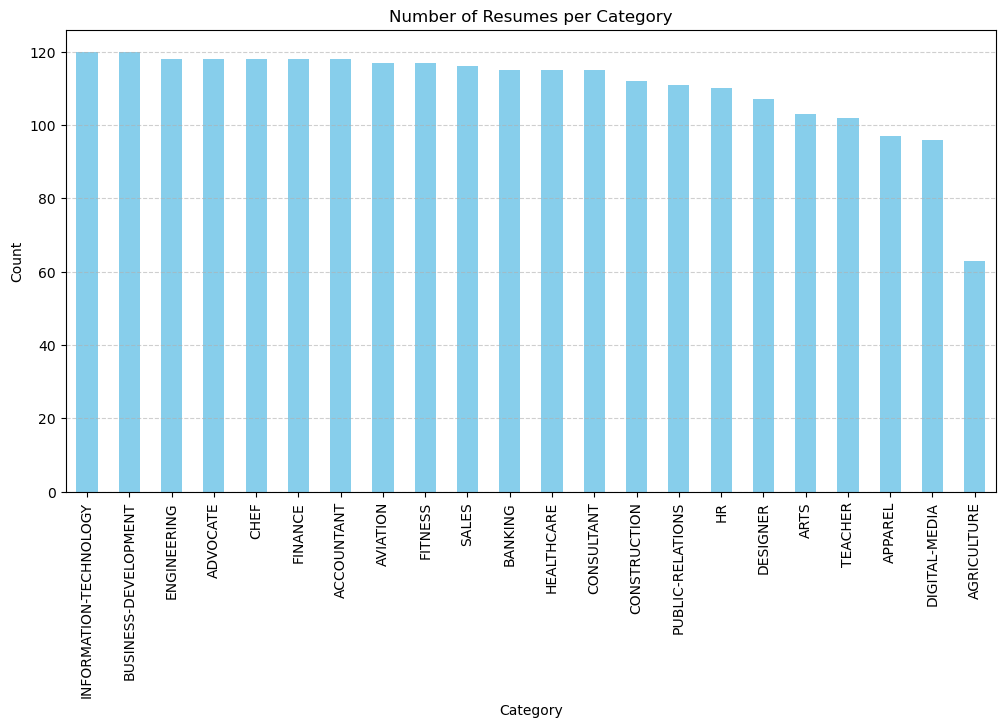

In [24]:
# ==========================================================
# Phase 3 - Exploratory Data Analysis
# ==========================================================

print("Number of categories:", df["Category"].nunique())
print(df["Category"].value_counts())

plt.figure(figsize=(12,6))
df["Category"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Number of Resumes per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

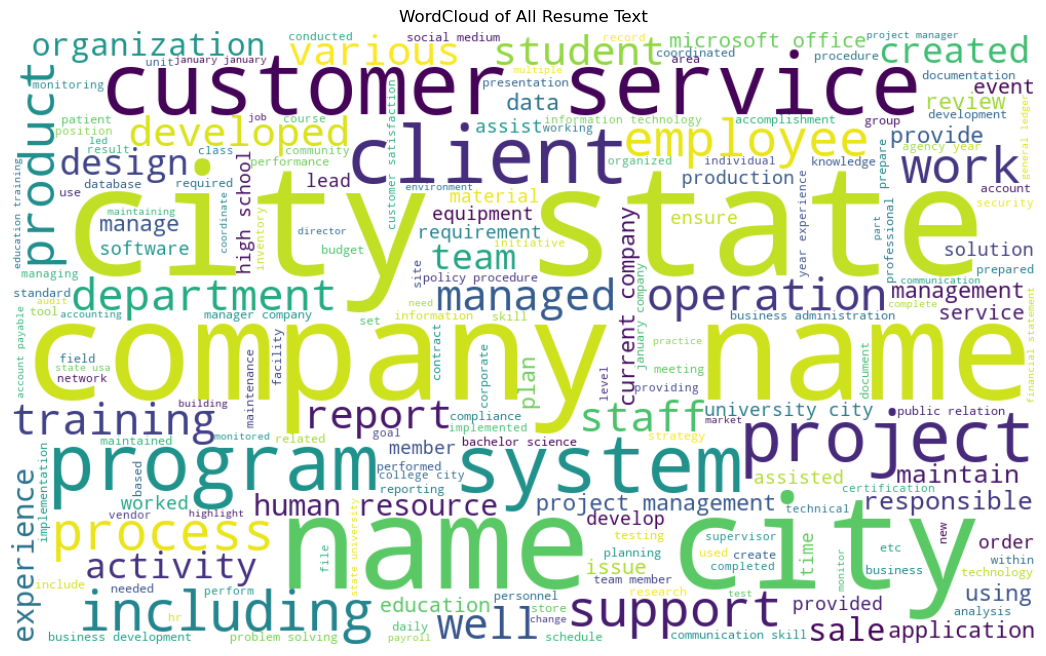

In [25]:
from wordcloud import WordCloud

all_words = " ".join(df["Cleaned_Resume"])
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_words)

plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of All Resume Text")
plt.show()

In [26]:
# ==========================================================
# Normalize and Map Categories into 8 Professional Groups
# ==========================================================

# Correct mapping for original 24 categories
category_map = {
    'INFORMATION-TECHNOLOGY': 'it',
    'ENGINEERING': 'engineering',
    'DIGITAL-MEDIA': 'digital-media',
    'HR': 'hr',
    'DESIGNER': 'designer',
    'TEACHER': 'education',
    'ADVOCATE': 'advocate',
    'ACCOUNTANT': 'finance',
    'CHEF': 'chef',
    'FITNESS': 'fitness',
    'AVIATION': 'aviation',
    'SALES': 'sales',
    'HEALTHCARE': 'healthcare',
    'CONSULTANT': 'consultant',
    'CONSTRUCTION': 'construction',
    'PUBLIC-RELATIONS': 'public-relations',
    'BANKING': 'finance',
    'APPAREL': 'fashion',
    'AGRICULTURE': 'agriculture',
    'AUTOMOBILE': 'automobile',
    'BPO': 'bpo',
    'BUSINESS-DEVELOPMENT': 'business',
    'FINANCE': 'finance',
    'ARTS': 'arts',
}

# Apply the mapping
df['Category'] = df['Category'].replace(category_map)

print("\n===== Categories AFTER Mapping =====")
print(df['Category'].value_counts())
print("\nRemaining Unique Categories:", df['Category'].unique())


===== Categories AFTER Mapping =====
Category
finance             351
it                  120
business            120
engineering         118
advocate            118
chef                118
aviation            117
fitness             117
sales               116
consultant          115
healthcare          115
construction        112
public-relations    111
hr                  110
designer            107
arts                103
education           102
fashion              97
digital-media        96
agriculture          63
Name: count, dtype: int64

Remaining Unique Categories: ['hr' 'designer' 'it' 'education' 'advocate' 'business' 'healthcare'
 'fitness' 'agriculture' 'sales' 'consultant' 'digital-media' 'chef'
 'finance' 'fashion' 'engineering' 'construction' 'public-relations'
 'arts' 'aviation']


In [27]:
merge_map = {
    'fitness': 'education-arts',
    'public-relations': 'business-management'
}

df['Category'] = df['Category'].replace(merge_map)

print("\n===== Final Category Counts =====")
print(df['Category'].value_counts())

print("\nFinal Unique Categories:", df['Category'].unique())


===== Final Category Counts =====
Category
finance                351
it                     120
business               120
engineering            118
advocate               118
chef                   118
aviation               117
education-arts         117
sales                  116
consultant             115
healthcare             115
construction           112
business-management    111
hr                     110
designer               107
arts                   103
education              102
fashion                 97
digital-media           96
agriculture             63
Name: count, dtype: int64

Final Unique Categories: ['hr' 'designer' 'it' 'education' 'advocate' 'business' 'healthcare'
 'education-arts' 'agriculture' 'sales' 'consultant' 'digital-media'
 'chef' 'finance' 'fashion' 'engineering' 'construction'
 'business-management' 'arts' 'aviation']


Normalize category names

Remove rare categories (< 20 samples)

In [28]:
counts = df["Category"].value_counts()
df = df[df["Category"].isin(counts[counts > 20].index)]


print("Categories AFTER removing rare ones:")
print(df['Category'].value_counts())
print("\nRemaining categories:", df['Category'].unique())


Categories AFTER removing rare ones:
Category
finance                351
it                     120
business               120
engineering            118
advocate               118
chef                   118
aviation               117
education-arts         117
sales                  116
consultant             115
healthcare             115
construction           112
business-management    111
hr                     110
designer               107
arts                   103
education              102
fashion                 97
digital-media           96
agriculture             63
Name: count, dtype: int64

Remaining categories: ['hr' 'designer' 'it' 'education' 'advocate' 'business' 'healthcare'
 'education-arts' 'agriculture' 'sales' 'consultant' 'digital-media'
 'chef' 'finance' 'fashion' 'engineering' 'construction'
 'business-management' 'arts' 'aviation']


Improved TF-IDF

In [29]:
# ==========================================================
# TF-IDF Vectorization
# ==========================================================

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Features and labels
X = df["Cleaned_Resume"]
y = df["Category"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Build TF-IDF
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=8000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shapes:", X_train_tfidf.shape, X_test_tfidf.shape)

TF-IDF shapes: (1940, 8000) (486, 8000)


In [30]:
# ==========================================================
# Phase 5 - Model Building & Evaluation (Balanced SVM)
# ==========================================================
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Train SVM
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
plt.show()

Classification Report:

                     precision    recall  f1-score   support

           advocate       0.62      0.42      0.50        24
        agriculture       0.86      0.46      0.60        13
               arts       0.62      0.48      0.54        21
           aviation       0.75      0.75      0.75        24
           business       0.77      0.83      0.80        24
business-management       0.72      0.82      0.77        22
               chef       0.78      0.88      0.82        24
       construction       0.76      0.86      0.81        22
         consultant       0.56      0.22      0.31        23
           designer       0.81      0.81      0.81        21
      digital-media       0.69      0.58      0.63        19
          education       0.78      0.70      0.74        20
     education-arts       0.81      0.71      0.76        24
        engineering       0.69      0.83      0.75        24
            fashion       0.67      0.53      0.59        19

In [31]:
# ==========================================================
#  - Hyperparameter Tuning for LinearSVC (GridSearchCV)
# ==========================================================

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    "C": [0.1, 0.5, 1, 2, 5],
    "class_weight": [None, "balanced"]
}

base_svc = LinearSVC()

grid_svc = GridSearchCV(
    estimator=base_svc,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

print("🔍 Running GridSearchCV for LinearSVC...")
grid_svc.fit(X_train_tfidf, y_train)

print("\n✅ Best parameters:", grid_svc.best_params_)
print("✅ Best CV macro F1:", grid_svc.best_score_)

# Best tuned model
best_svc = grid_svc.best_estimator_

# Evaluate on test set
y_pred_tuned = best_svc.predict(X_test_tfidf)
print("\n===== Tuned LinearSVC - Test Performance =====\n")
print(classification_report(y_test, y_pred_tuned))

🔍 Running GridSearchCV for LinearSVC...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best parameters: {'C': 1, 'class_weight': 'balanced'}
✅ Best CV macro F1: 0.7062145653354192

===== Tuned LinearSVC - Test Performance =====

                     precision    recall  f1-score   support

           advocate       0.60      0.38      0.46        24
        agriculture       0.75      0.46      0.57        13
               arts       0.62      0.48      0.54        21
           aviation       0.75      0.75      0.75        24
           business       0.77      0.83      0.80        24
business-management       0.72      0.82      0.77        22
               chef       0.78      0.88      0.82        24
       construction       0.76      0.86      0.81        22
         consultant       0.50      0.22      0.30        23
           designer       0.81      0.81      0.81        21
      digital-media       0.69      0.58      0.63        19
          education  

In [32]:
# ==========================================================
# Step 9 - BERT Embeddings + Hybrid Model (EXPERIMENTAL)
# ==========================================================

# If not installed already:
# !{sys.executable} -m pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer
import numpy as np

# Small, fast BERT model
bert_model = SentenceTransformer("all-MiniLM-L6-v2")

print("✅ Loaded BERT model: all-MiniLM-L6-v2")

✅ Loaded BERT model: all-MiniLM-L6-v2


In [33]:
# Use the same train/test split texts (X_train, X_test) but as plain Python lists
X_train_texts = X_train.tolist()
X_test_texts = X_test.tolist()

print("🔁 Computing BERT embeddings... (this can take a little time)")

X_train_bert = bert_model.encode(
    X_train_texts,
    batch_size=32,
    show_progress_bar=True
)
X_test_bert = bert_model.encode(
    X_test_texts,
    batch_size=32,
    show_progress_bar=True
)

print("BERT train shape:", X_train_bert.shape)
print("BERT test  shape:", X_test_bert.shape)

# Convert TF-IDF sparse matrices to dense for concatenation
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

print("TF-IDF dense train shape:", X_train_tfidf_dense.shape)
print("TF-IDF dense test  shape:", X_test_tfidf_dense.shape)

# Hybrid = [BERT | TF-IDF]
X_train_hybrid = np.hstack([X_train_bert, X_train_tfidf_dense])
X_test_hybrid = np.hstack([X_test_bert, X_test_tfidf_dense])

print("Hybrid train shape:", X_train_hybrid.shape)
print("Hybrid test  shape:", X_test_hybrid.shape)

🔁 Computing BERT embeddings... (this can take a little time)


Batches:   0%|          | 0/61 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

BERT train shape: (1940, 384)
BERT test  shape: (486, 384)
TF-IDF dense train shape: (1940, 8000)
TF-IDF dense test  shape: (486, 8000)
Hybrid train shape: (1940, 8384)
Hybrid test  shape: (486, 8384)


In [34]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

hybrid_clf = LinearSVC(class_weight="balanced")

print("🚀 Training Hybrid LinearSVC on [BERT + TF-IDF] features...")
hybrid_clf.fit(X_train_hybrid, y_train)

y_pred_hybrid = hybrid_clf.predict(X_test_hybrid)

print("\n===== Hybrid Model (BERT + TF-IDF) - Test Performance =====\n")
print(classification_report(y_test, y_pred_hybrid))

🚀 Training Hybrid LinearSVC on [BERT + TF-IDF] features...

===== Hybrid Model (BERT + TF-IDF) - Test Performance =====

                     precision    recall  f1-score   support

           advocate       0.71      0.42      0.53        24
        agriculture       0.86      0.46      0.60        13
               arts       0.82      0.43      0.56        21
           aviation       0.81      0.88      0.84        24
           business       0.92      0.96      0.94        24
business-management       0.78      0.82      0.80        22
               chef       0.85      0.96      0.90        24
       construction       0.83      0.86      0.84        22
         consultant       0.86      0.78      0.82        23
           designer       1.00      0.86      0.92        21
      digital-media       0.79      0.58      0.67        19
          education       0.81      0.85      0.83        20
     education-arts       0.81      0.71      0.76        24
        engineering     

In [35]:
# ==========================================================
# Save Hybrid Model (BERT + TF-IDF) for Streamlit
# ==========================================================

import joblib
import os

save_dir = "../models"
os.makedirs(save_dir, exist_ok=True)

# Save HYBRID MODEL
joblib.dump(hybrid_clf, os.path.join(save_dir, "resume_hybrid_model.pkl"))

# Save TF-IDF vectorizer (overwrite old one)
joblib.dump(tfidf, os.path.join(save_dir, "tfidf_vectorizer.pkl"))

print("✅ HYBRID MODEL SAVED SUCCESSFULLY!")
print("📁 Saved to folder:", save_dir)

✅ HYBRID MODEL SAVED SUCCESSFULLY!
📁 Saved to folder: ../models


In [36]:
# ==========================================================
# Phase 7 - Quick Model Prediction Tests
# ==========================================================

test_samples = [
    "Data Scientist with 3+ years of experience in Python, SQL, Machine Learning, NLP, Pandas, Scikit-Learn, feature engineering, and model deployment.",
    "Business development specialist with experience in sales, revenue growth, client communication and account management.",
    "Software engineer skilled in Python, Django, APIs, Git, and cloud platforms like AWS.",
]

print("🔍 Testing predictions...\n")

for text in test_samples:
    clean = clean_text(text)
    # TF-IDF
    vec_tfidf = tfidf.transform([clean]).toarray()
    # BERT
    vec_bert = bert_model.encode([text])  # original text for semantics
    # Hybrid
    vec_hybrid = np.hstack([vec_bert, vec_tfidf])
    # Predict
    pred = hybrid_clf.predict(vec_hybrid)[0]
    print(f"Input: {text}\nPredicted Category: 👉 {pred}\n" + "-"*70)

🔍 Testing predictions...

Input: Data Scientist with 3+ years of experience in Python, SQL, Machine Learning, NLP, Pandas, Scikit-Learn, feature engineering, and model deployment.
Predicted Category: 👉 engineering
----------------------------------------------------------------------
Input: Business development specialist with experience in sales, revenue growth, client communication and account management.
Predicted Category: 👉 business
----------------------------------------------------------------------
Input: Software engineer skilled in Python, Django, APIs, Git, and cloud platforms like AWS.
Predicted Category: 👉 engineering
----------------------------------------------------------------------
